# Apriori - Mineração de regras frequentes

In [2]:
#Usando a implementação do Apriori disponível na biblioteca mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

### Exemplo simples

In [15]:
#Formato de lista de listas (cada lista simula uma transação)
tranactions_exmplo  =   [['Pao','Leite'],
                         ['Pao','Fralda','Cerveja','Ovos'],
                         ['Leite','Fralda','Cerveja','Coca'],
                         ['Pao','Leite','Fralda','Cerveja'],
                         ['Pao','Leite','Fralda','Coca']]

#Recurso da biblioteca mlxtend para codificar transações no padrão numpy array booleano 
# --- cada coluna é um item e linhas indicam se esse item existe em uma transação.
te = TransactionEncoder()
encoded = te.fit(tranactions_exmplo).transform(tranactions_exmplo)
print(encoded)

dfExemplo = pd.DataFrame(encoded, columns=te.columns_)
dfExemplo


[[False False False  True False  True]
 [ True False  True False  True  True]
 [ True  True  True  True False False]
 [ True False  True  True False  True]
 [False  True  True  True False  True]]


,Cerveja,Coca,Fralda,Leite,Ovos,Pao
0,False,False,False,True,False,True
1,True,False,True,False,True,True
2,True,True,True,True,False,False
3,True,False,True,True,False,True
4,False,True,True,True,False,True


In [16]:
#Calcula os conjuntos de itens (itemsets) com suporte >= 0,4
frequent_itemsets = apriori(dfExemplo, min_support=0.4, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Cerveja)
1,0.4,(Coca)
2,0.8,(Fralda)
3,0.8,(Leite)
4,0.8,(Pao)
5,0.6,"(Cerveja, Fralda)"
6,0.4,"(Cerveja, Leite)"
7,0.4,"(Cerveja, Pao)"
8,0.4,"(Fralda, Coca)"
9,0.4,"(Leite, Coca)"


## Exemplo com o dataset do filme Titanic

### Dataset e Preprocessamento 

In [8]:
dfTitanicFull = pd.read_csv('titanic.csv')
dfTitanicFull

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [17]:
#Excluindo as features que não quero itentificar associações
dfTitanic = dfTitanicFull.drop(columns=['Name','Parents/Children Aboard','Siblings/Spouses Aboard','Fare'])

# Trocando os valores binários para um string
mudar_status = {0: "Morreu", 1: "Sobreviveu"}
dfTitanic.replace({'Survived' : mudar_status}, inplace=True)

mudar_classe = {1: "1-classe", 2: "2-classe", 3:"3-classe"}
dfTitanic.replace({'Pclass' : mudar_classe}, inplace=True)

#Criando labels para as idades
dfTitanic['Age'] = pd.cut(dfTitanic.Age,bins=[0,17,65,120],labels=['Crianca','Adulto','Idoso'])

dfTitanic


,Survived,Pclass,Sex,Age
0,Morreu,3-classe,male,Adulto
1,Sobreviveu,1-classe,female,Adulto
2,Sobreviveu,3-classe,female,Adulto
3,Sobreviveu,1-classe,female,Adulto
4,Morreu,3-classe,male,Adulto
...,...,...,...,...
882,Morreu,2-classe,male,Adulto
883,Sobreviveu,1-classe,female,Adulto
884,Morreu,3-classe,female,Crianca
885,Sobreviveu,1-classe,male,Adulto


### Transformações necessárias

In [10]:
transactions = []
numLines = dfTitanic.shape[0]
numColumns = dfTitanic.shape[1]

#Transforma para lista de listas (ideia de transações)
for i in range(0,numLines):
    transactions.append([str(dfTitanic.values[i,j]) for j in range(0,numColumns)])

#Recurso da biblioteca mlxtend para codificar transações -- explicado acima.
te = TransactionEncoder()
transEncoded = te.fit(transactions).transform(transactions)

df = pd.DataFrame(transEncoded, columns=te.columns_)
df


,1-classe,2-classe,3-classe,Adulto,Crianca,Idoso,Morreu,Sobreviveu,female,male
0,False,False,True,True,False,False,True,False,False,True
1,True,False,False,True,False,False,False,True,True,False
2,False,False,True,True,False,False,False,True,True,False
3,True,False,False,True,False,False,False,True,True,False
4,False,False,True,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
882,False,True,False,True,False,False,True,False,False,True
883,True,False,False,True,False,False,False,True,True,False
884,False,False,True,False,True,False,True,False,True,False
885,True,False,False,True,False,False,False,True,False,True


### Itemsets frequentes

In [18]:
#Itemsets frquequentes com um determinado suporte informado
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
print(frequent_itemsets.to_string())

     support                          itemsets
0   0.243517                        (1-classe)
1   0.207441                        (2-classe)
2   0.549042                        (3-classe)
3   0.842165                          (Adulto)
4   0.146561                         (Crianca)
5   0.614431                          (Morreu)
6   0.385569                      (Sobreviveu)
7   0.354002                          (female)
8   0.645998                            (male)
9   0.225479                (1-classe, Adulto)
10  0.153326            (1-classe, Sobreviveu)
11  0.105975                (1-classe, female)
12  0.137542                  (1-classe, male)
13  0.179256                (Adulto, 2-classe)
14  0.109357                (Morreu, 2-classe)
15  0.121759                  (male, 2-classe)
16  0.437430                (Adulto, 3-classe)
17  0.107103               (Crianca, 3-classe)
18  0.414882                (Morreu, 3-classe)
19  0.134160            (Sobreviveu, 3-classe)
20  0.162345 

### Regras de associação

In [19]:
#Regras com o valor de confiança mínimo escolhido
dfRegras= association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
dfRegras

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1-classe),(Adulto),0.243517,0.842165,0.225479,0.925926,1.099460,0.020397,2.130778
1,(1-classe),(Sobreviveu),0.243517,0.385569,0.153326,0.629630,1.632987,0.059433,1.658963
2,(1-classe),(male),0.243517,0.645998,0.137542,0.564815,0.874329,-0.019769,0.813452
3,(2-classe),(Adulto),0.207441,0.842165,0.179256,0.864130,1.026083,0.004557,1.161669
4,(2-classe),(Morreu),0.207441,0.614431,0.109357,0.527174,0.857988,-0.018101,0.815457
...,...,...,...,...,...,...,...,...,...
73,"(Morreu, 3-classe)","(male, Adulto)",0.414882,0.559188,0.284104,0.684783,1.224601,0.052107,1.398437
74,"(male, Adulto)","(Morreu, 3-classe)",0.559188,0.414882,0.284104,0.508065,1.224601,0.052107,1.189421
75,"(male, 3-classe)","(Morreu, Adulto)",0.386697,0.531003,0.284104,0.734694,1.383595,0.078766,1.767756
76,"(Adulto, 3-classe)","(Morreu, male)",0.437430,0.523112,0.284104,0.649485,1.241579,0.055279,1.360535


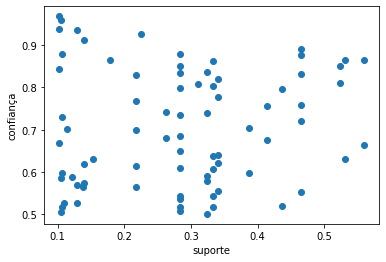

In [13]:
#Scatter plot da confiança e suporte. Auxilia no entendimento do espaço de regras
plt.scatter(data = dfRegras, x='support', y='confidence')
plt.xlabel('suporte')
plt.ylabel('confiança')
plt.show()

In [20]:
#Filtrando regras apenas com o consequente "Sobreviveu" ou "Morreu"
dfRegras[(dfRegras['consequents'] == {'Sobreviveu'}) | (dfRegras['consequents'] == {'Morreu'}) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(1-classe),(Sobreviveu),0.243517,0.385569,0.153326,0.629630,1.632987,0.059433,1.658963
4,(2-classe),(Morreu),0.207441,0.614431,0.109357,0.527174,0.857988,-0.018101,0.815457
10,(3-classe),(Morreu),0.549042,0.614431,0.414882,0.755647,1.229833,0.077534,1.577918
14,(Adulto),(Morreu),0.842165,0.614431,0.531003,0.630522,1.026189,0.013552,1.043552
20,(male),(Morreu),0.645998,0.614431,0.523112,0.809773,1.317924,0.126191,2.026892
21,(female),(Sobreviveu),0.354002,0.385569,0.262683,0.742038,1.924526,0.126191,2.381867
24,"(1-classe, Adulto)",(Sobreviveu),0.225479,0.385569,0.139797,0.620000,1.608012,0.052859,1.616923
30,"(1-classe, female)",(Sobreviveu),0.105975,0.385569,0.102593,0.968085,2.510794,0.061732,19.252161
32,"(Adulto, 2-classe)",(Morreu),0.179256,0.614431,0.104848,0.584906,0.951947,-0.005293,0.928872
38,"(male, 2-classe)",(Morreu),0.121759,0.614431,0.102593,0.842593,1.371339,0.027781,2.449499


In [18]:
#Conta quantos elementos tem no antecedente e armazena esse valor em "antecedent_len"
dfRegras["antecedent_len"] = dfRegras["antecedents"].apply(lambda x: len(x))

#Filtra regras com pelo menos dois elementos no antecedente, com lift>1 e consequente "Sobreviveu" ou "Morreu"
dfRegras[ (dfRegras['antecedent_len'] >= 2) &
          (dfRegras['lift'] > 1) &
          ((dfRegras['consequents'] == {'Sobreviveu'}) | (dfRegras['consequents'] == {'Morreu'}))]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
24,"(1-classe, Adulto)",(Sobreviveu),0.225479,0.385569,0.139797,0.620000,1.608012,0.052859,1.616923,2
30,"(female, 1-classe)",(Sobreviveu),0.105975,0.385569,0.102593,0.968085,2.510794,0.061732,19.252161,2
38,"(2-classe, male)",(Morreu),0.121759,0.614431,0.102593,0.842593,1.371339,0.027781,2.449499,2
41,"(Adulto, 3-classe)",(Morreu),0.437430,0.614431,0.340474,0.778351,1.266783,0.071703,1.739545,2
52,"(male, 3-classe)",(Morreu),0.386697,0.614431,0.333709,0.862974,1.404510,0.096111,2.813836,2
58,"(male, Adulto)",(Morreu),0.559188,0.614431,0.465614,0.832661,1.355175,0.122032,2.304125,2
64,"(female, Adulto)",(Sobreviveu),0.282976,0.385569,0.217587,0.768924,1.994257,0.108480,2.659002,2
70,"(male, Adulto, 3-classe)",(Morreu),0.323563,0.614431,0.284104,0.878049,1.429045,0.085297,3.161669,3


### Mesmo exemplo anterior usando fp-Growth

In [19]:
from mlxtend.frequent_patterns import fpgrowth

#Identifica conjuntos frequentes
frequentFpGrowth= fpgrowth(df, min_support=0.1, use_colnames=True)

#Itentifica regras
dfRegrasFP= association_rules(frequentFpGrowth, metric='confidence', min_threshold=0.5)

#Faz os mesmos filtros aplicados com o Apriori no exemplo acima
dfRegrasFP["antecedent_len"] = dfRegrasFP["antecedents"].apply(lambda x: len(x))
dfRegrasFP[ (dfRegrasFP['antecedent_len'] >= 2) &
            (dfRegrasFP['lift'] > 1) &
           ((dfRegrasFP['consequents'] == {'Sobreviveu'}) | (dfRegrasFP['consequents'] == {'Morreu'}))]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
8,"(male, Adulto)",(Morreu),0.559188,0.614431,0.465614,0.832661,1.355175,0.122032,2.304125,2
20,"(Adulto, 3-classe)",(Morreu),0.437430,0.614431,0.340474,0.778351,1.266783,0.071703,1.739545,2
25,"(male, 3-classe)",(Morreu),0.386697,0.614431,0.333709,0.862974,1.404510,0.096111,2.813836,2
37,"(male, Adulto, 3-classe)",(Morreu),0.323563,0.614431,0.284104,0.878049,1.429045,0.085297,3.161669,3
51,"(female, Adulto)",(Sobreviveu),0.282976,0.385569,0.217587,0.768924,1.994257,0.108480,2.659002,2
59,"(1-classe, Adulto)",(Sobreviveu),0.225479,0.385569,0.139797,0.620000,1.608012,0.052859,1.616923,2
62,"(female, 1-classe)",(Sobreviveu),0.105975,0.385569,0.102593,0.968085,2.510794,0.061732,19.252161,2
77,"(2-classe, male)",(Morreu),0.121759,0.614431,0.102593,0.842593,1.371339,0.027781,2.449499,2
